# EE 519 — Time-domain Analysis of speech (Notebook 0)
## Record and Explore Speech in the Time Domain

### What you’ll do
1. **Load a provided WAV** (baseline) and/or **record your own speech** (optional).
2. Record **vowels (voiced)**, **fricatives (unvoiced)**, and a **short sentence**, with **intentional silences**.
3. Record **soft / normal / loud** to see amplitude effects.
4. Visualize **nonstationarity** in the waveform and simple time-domain summaries.

> **Tip for a clean recording:** speak for ~4–6 seconds and include ~1 seconds of silence at the start and end.


---
## 0) Setup
We’ll use only core scientific Python libraries.

- If you can record from your laptop mic, we’ll try `sounddevice`.
- If recording doesn’t work on your machine, **upload a WAV file** and proceed.


In [19]:
import os
import numpy as np
import matplotlib.pyplot as plt

from scipy.io import wavfile
from IPython.display import Audio, display

plt.rcParams["figure.figsize"] = (12, 3)
plt.rcParams["axes.grid"] = True

def to_mono(x):
    """Ensure mono float32 in [-1, 1]."""
    x = np.asarray(x)
    if x.ndim == 2:  # stereo -> mono
        x = x.mean(axis=1)
    if np.issubdtype(x.dtype, np.integer):
        maxv = np.iinfo(x.dtype).max
        x = x.astype(np.float32) / maxv
    else:
        x = x.astype(np.float32)
    return np.clip(x, -1.0, 1.0)

def remove_dc(x):
    return x - np.mean(x)

def peak_normalize(x, target=0.95):
    peak = np.max(np.abs(x)) + 1e-12
    return np.clip(x * (target / peak), -1.0, 1.0)

def plot_waveform(x, fs, title="Waveform", tlim=None):
    t = np.arange(len(x)) / fs
    plt.figure()
    plt.plot(t, x, linewidth=0.8)
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")    
    plt.title(title)
    if tlim is not None:
        plt.xlim(tlim)
    plt.show()

def plot_zoom_grid(x, fs, regions, suptitle="Zoomed regions"):
    n = len(regions)
    plt.figure(figsize=(12, 2.5*n))
    for i, (label, t0, t1) in enumerate(regions, start=1):
        a = int(max(0, t0*fs))
        b = int(min(len(x), t1*fs))
        t = np.arange(a, b) / fs
        plt.subplot(n, 1, i)
        plt.plot(t, x[a:b], linewidth=0.9)
        plt.title(f"{label}: {t0:.3f}–{t1:.3f} s")
        plt.xlabel("Time (s)")
        plt.ylabel("Amp")
        plt.grid(True)
    plt.tight_layout()
    plt.suptitle(suptitle, y=1.02, fontsize=14)
    plt.show()

def play_audio(x, fs):
    display(Audio(x, rate=fs))

---
## 1) Load a WAV/record

### Upload your own WAV
Upload a file in your Jupyter environment (e.g.,`speech.wav`) and, place it in the same folder as this notebook.


In [20]:
import sounddevice as sd 
import soundfile as sf
def record_audio(duration=5):
    print(f"Recording for {duration} seconds...")
    fs = 16000
    x = sd.rec(int(duration*fs), samplerate = fs, channels = 1, dtype='float32')
    sd.wait()
    return x.flatten(), fs
def save_wav(filename, x, fs):
    sf.write(filename, x, fs)


In [46]:
# ====== Choose your audio file here ======
def load_audio(wav_path):
    
    #x,fs = record_audio()
    #save_wav(wav_path, x, fs) 

    if not os.path.exists(wav_path):
        print(f"File not found: {wav_path}\nUpload a WAV and update wav_path.")
        return None, None
    else:
        fs, x = wavfile.read(wav_path)
        x = to_mono(x)
        print("Loaded:", wav_path)
        print("Sampling rate (Hz):", fs)
        print("Duration (s):", len(x)/fs)
        return x, fs
wav_path = "speech.wav"  # <-- UPDATE THIS PATH
x, fs = load_audio(wav_path)

Loaded: speech.wav
Sampling rate (Hz): 16000
Duration (s): 5.0


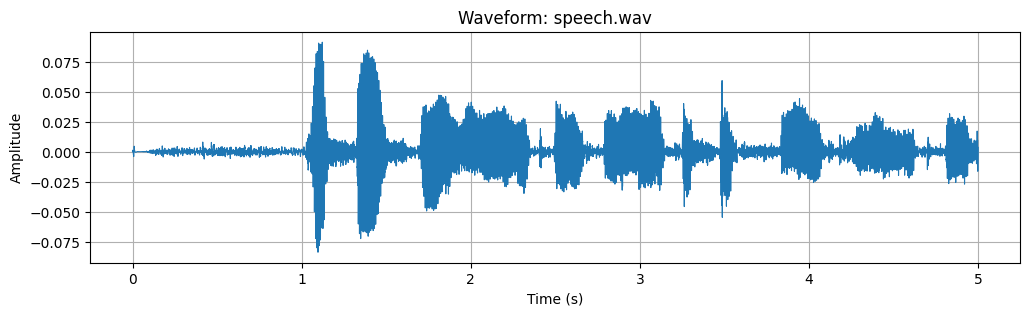

In [47]:
# Play and view the waveform (if loaded)
if "x" in globals():
    play_audio(x, fs)
    plot_waveform(x, fs, title=f"Waveform: {wav_path}")

---
## 2)Record your own speech 

Record something like:
- **Silence (1–2 s)**
- **Voiced vowels**: “aaaa”, “iiii”, “oooo”
- **Unvoiced fricatives**: “ssss”, “shhhh”
- **Short sentence**: “Today is a sunny day.”
- **Silence (1–2 s)**

Then repeat for **soft**, **normal**, and **loud** voice.

In [23]:
# Try to import sounddevice for microphone recording
try:
    import sounddevice as sd
    SOUNDDEVICE_OK = True
    print("sounddevice available ✅")    
except Exception as e:
    SOUNDDEVICE_OK = False
    print("sounddevice not available ❌") 
    print("If you can't record, just use a WAV file and continue.")

sounddevice available ✅


In [24]:
def record_audio(duration_s=8.0, fs=16000, channels=1):
    """Record audio from default microphone. Returns mono float32 signal."""
    if not SOUNDDEVICE_OK:
        raise RuntimeError("sounddevice is not available on this system.")
    print("Recording... speak now!")
    y = sd.rec(int(duration_s * fs), samplerate=fs, channels=channels, dtype="float32")
    sd.wait()
    y = y.squeeze()
    print("Done.")
    return y, fs

In [34]:
#Record soft / normal / loud (optional)
#Uncomment and run if your mic works.


In [ ]:
# #y_soft, fs_rec = record_audio(duration_s=10, fs=16000)
# #y_norm, fs_rec = record_audio(duration_s=10, fs=16000)
# #y_loud, fs_rec = record_audio(duration_s=10, fs=16000)
# save_wav("recorded_normal.wav", y_norm, fs_rec)
# save_wav("recorded_soft.wav", y_soft, fs_rec)
# save_wav("recorded_loud.wav", y_loud, fs_rec)


Loaded: recorded_soft.wav
Sampling rate (Hz): 16000
Duration (s): 10.0
Loaded: recorded_normal.wav
Sampling rate (Hz): 16000
Duration (s): 10.0
Loaded: recorded_loud.wav
Sampling rate (Hz): 16000
Duration (s): 10.0


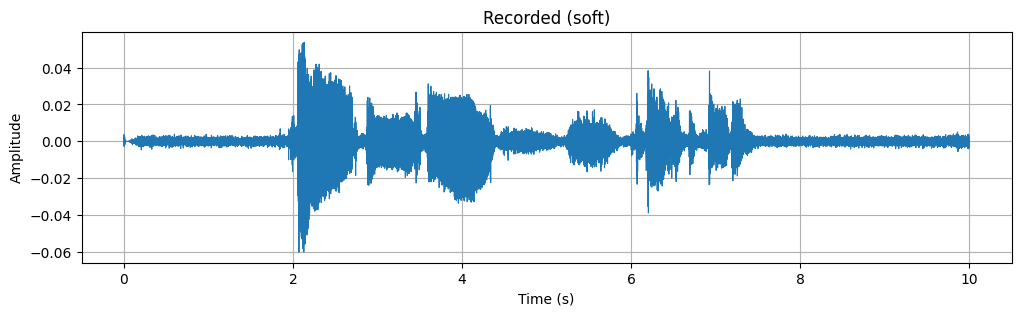

In [69]:
#After recording:
y_soft, fs_rec = load_audio("recorded_soft.wav")
y_norm, fs_rec = load_audio("recorded_normal.wav")
y_loud, fs_rec = load_audio("recorded_loud.wav")
play_audio(y_soft, fs_rec)
plot_waveform(y_soft, fs_rec, title="Recorded (soft)")

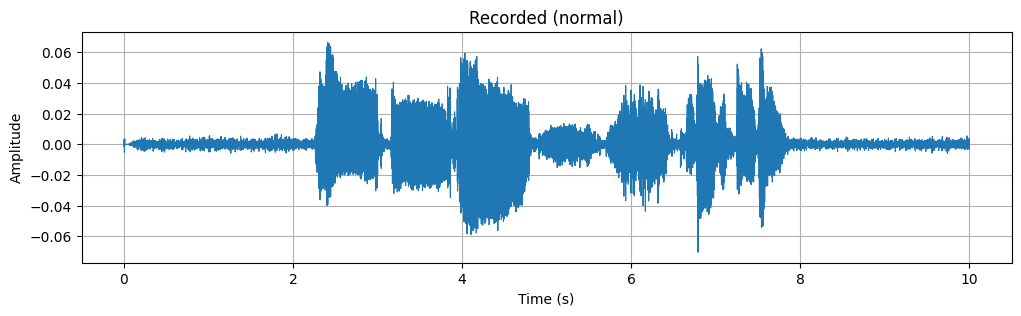

In [70]:
#After recording:
play_audio(y_norm, fs_rec)
plot_waveform(y_norm, fs_rec, title="Recorded (normal)")

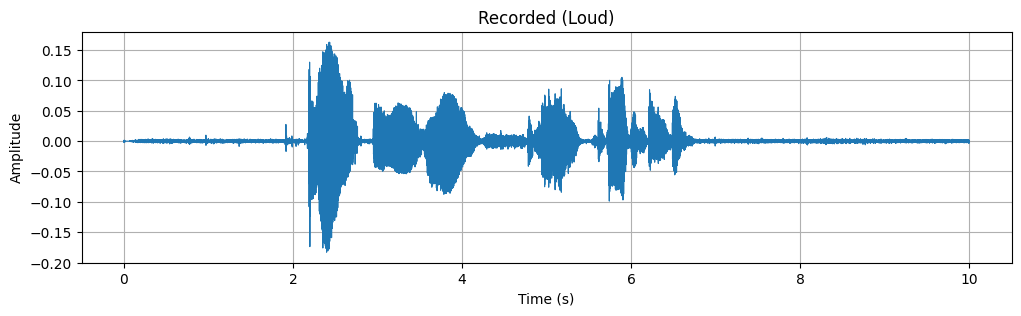

In [71]:
#After recording:
play_audio(y_loud, fs_rec)
plot_waveform(y_loud, fs_rec, title="Recorded (Loud)")

---
## 3) Compare soft / normal / loud (amplitude effects)
If you recorded multiple takes, this section shows how amplitude changes.

If you only loaded one WAV, you can still run the analysis using that single file.


In [58]:
def summarize_signal(x, fs, name="signal"):
    x_dc = remove_dc(x)
    rms = np.sqrt(np.mean(x_dc**2))
    peak = np.max(np.abs(x_dc))
    print(f"{name}: duration={len(x)/fs:.2f}s | RMS={rms:.4f} | peak={peak:.4f}")

signals = []
if "x" in globals():
    signals.append(("loaded", x, fs))

for var, label in [("y_soft","soft"),("y_norm","normal"),("y_loud","loud")]:
    if var in globals():
        signals.append((label, globals()[var], fs_rec))

for name, sig, sfs in signals:
    summarize_signal(sig, sfs, name=name)

loaded: duration=5.00s | RMS=0.0122 | peak=0.0912
soft: duration=10.00s | RMS=0.0063 | peak=0.0601
normal: duration=10.00s | RMS=0.0102 | peak=0.0703
loud: duration=10.00s | RMS=0.0175 | peak=0.1830


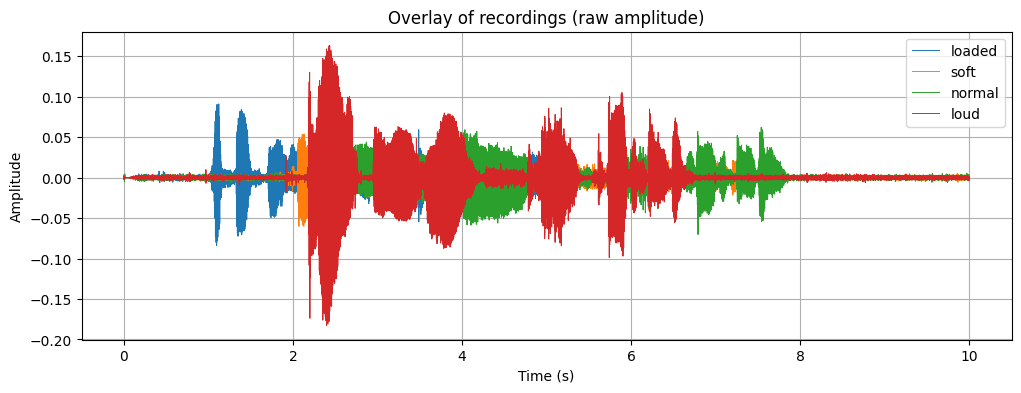

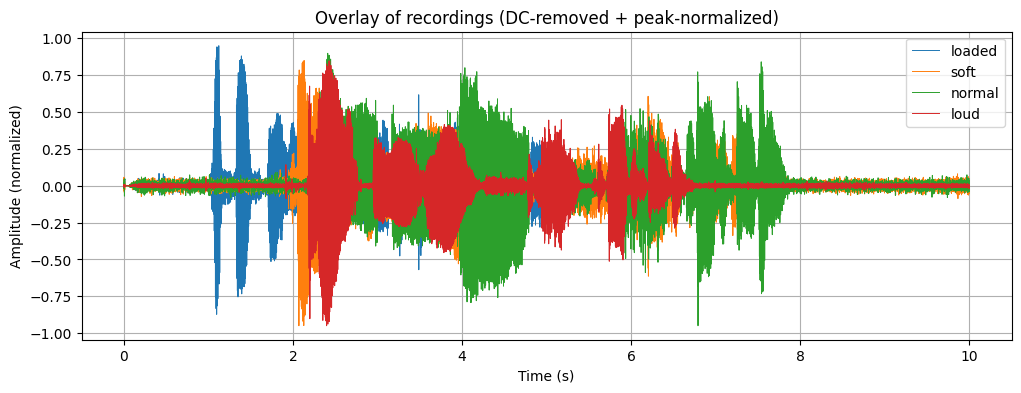

In [59]:
# Overlay waveforms for comparison (raw + peak-normalized)
if len(signals) >= 2:
    plt.figure(figsize=(12, 4))
    for name, sig, sfs in signals:
        t = np.arange(len(sig)) / sfs
        plt.plot(t, sig, linewidth=0.7, label=name)
    plt.title("Overlay of recordings (raw amplitude)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude")
    plt.legend()
    plt.show()

    plt.figure(figsize=(12, 4))
    for name, sig, sfs in signals:
        sig_n = peak_normalize(remove_dc(sig))
        t = np.arange(len(sig_n)) / sfs
        plt.plot(t, sig_n, linewidth=0.7, label=name)
    plt.title("Overlay of recordings (DC-removed + peak-normalized)")
    plt.xlabel("Time (s)")
    plt.ylabel("Amplitude (normalized)")
    plt.legend()
    plt.show()
else:
    print("(Skip) Need at least 2 signals (e.g., soft/normal/loud) to compare overlays.")

---
## 4) Nonstationarity: see how speech changes over time
Speech is **nonstationary**: its properties change from silence → voiced → unvoiced → transitions.

Below, we’ll:
1. Plot the full waveform
2. Zoom into a few regions (you choose time ranges)

**Goal:** visually compare:
- **silence** (low amplitude)
- **voiced vowel** (quasi-periodic)
- **unvoiced fricative** (noise-like)


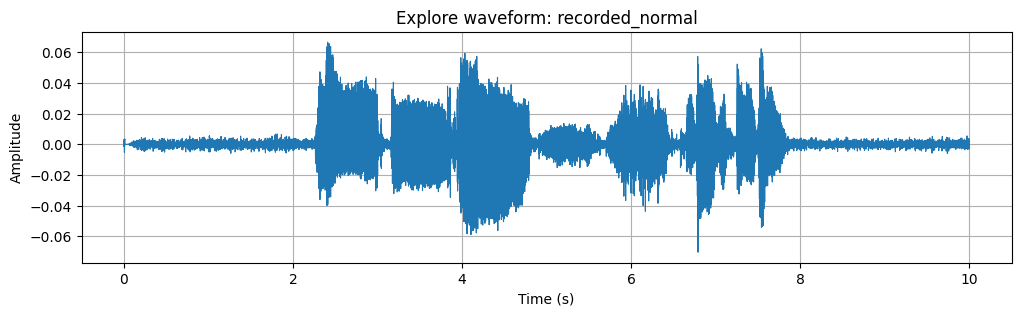

In [60]:
# Select which signal to explore
if "y_norm" in globals():
    sig_name, sig, fs_use = "recorded_normal", y_norm, fs_rec
elif "x" in globals():
    sig_name, sig, fs_use = "loaded", x, fs
else:
    raise RuntimeError("No audio available. Load a WAV or record audio.")

sig = to_mono(sig)
sig = np.clip(sig, -1.0, 1.0)

play_audio(sig, fs_use)
plot_waveform(sig, fs_use, title=f"Explore waveform: {sig_name}")

### Choose 3 regions to zoom
Set three time intervals (in seconds):
- **Silence** region
- **Voiced vowel** region
- **Unvoiced fricative** region

> Tip: Use the full waveform plot above to estimate where these regions are.


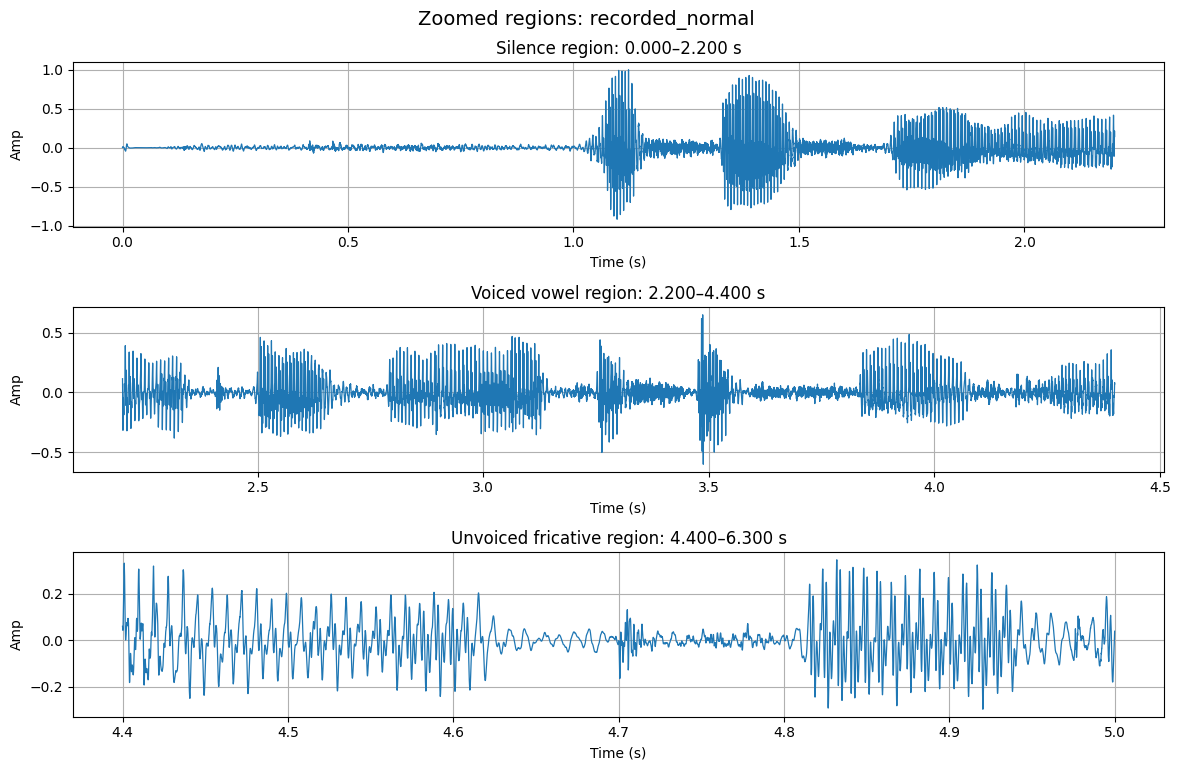

In [68]:
# Edit these after looking at the waveform plot


regions = [
    ("Silence region", 0, 2.2),
    ("Voiced vowel region", 2.2, 4.4),
    ("Unvoiced fricative region", 4.4, 6.3),
]
def segment_by_time(x, fs, start_sec, end_sec):
    """Extract a segment of the signal from start_sec to end_sec."""
    io_start = int(start_sec * fs)
    io_end = int(end_sec * fs)
    return x[io_start:io_end]
silence_region = segment_by_time(sig, fs_use, 0, 2.2)
voiced_region = segment_by_time(sig, fs_use, 2.2, 4.4)
unvoiced_region = segment_by_time(sig, fs_use, 4.4, 6.3)
play_audio(silence_region, fs_use)
play_audio(voiced_region, fs_use)
play_audio(unvoiced_region, fs_use)

# regions = [
#     ("Silence region", 0, 0.8),
#     ("Voiced vowel region", 1.32, 1.38),
#     ("Unvoiced fricative region", 1.4, 1.44),
# ]

##plot_zoom_grid(x, fs_use, regions, suptitle=f"Zoomed regions: {sig_name}")
plot_zoom_grid(x/max(abs(x)), fs_use, regions, suptitle=f"Zoomed regions: {sig_name}")

In [63]:
from IPython.display import Audio
Audio(sig[int(0.5*fs_use):int(1.5*fs_use)], rate=fs_use)

---
## 5) Reflection questions (write your answers in a markdown cell)
1. In your **voiced vowel region**, what visual evidence suggests quasi-periodicity?
2. In your **unvoiced fricative region**, what visual evidence suggests noise-like behavior?
3. Compare **soft vs loud** recordings: what changes? what stays similar?

✅ When you’re done, move to **Notebook 1: Framing & Windowing**.


**Student Answer:** 

1. In the voiced vowels region, "aaa", "iii", "oooo" I can see the vowels being voiced at similar amplitudes. From what I see there are many lines in the zoomed in region this suggest that it is indeed quasi periodicity. They are very similar amplituded and at similar frequencies for each sound but ultimately they vary slightly. 
2. In my unvoiced fricative region the "sss" and "shhh" are sharp but smaller in amplitude suggesting that it is lower power and also the frequency is smaller. It is very pointy and spaced out. It does not look curvy like the voiced vowel regions. 

3. for th soft vs loud recording the shape stays relatively similar but the softer one has a much smaller amplitude compared to the loud sound. I would say that might be about it. Also in the pursuit of trying to be loud the frequency might have changed or more pronunciation occured. So it is not exactly a 1 to 1 but it does resemble each other. 


